# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

# Gather the html from the current page in the browser
html = browser.html

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

# Find the table element
table = soup.find('table')

# Extract all rows from the table
data_rows = table.find_all('tr')

# Loop through the rows and print their content
for row in data_rows:
    print(row.text.strip())


id
terrestrial_date
sol
ls
month
min_temp
pressure
2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

rows = []

# Loop through the scraped data to create a list of rows

for row in data_rows[1:]:  # Skip the header row (index 0)
    columns = row.find_all('td')
    if len(columns) == 7:  # Ensure there are 7 columns of data
        row_data = [column.text.strip() for column in columns]
        rows.append(row_data)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# List of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the list of rows and column names
df = pd.DataFrame(rows, columns=column_names)


In [8]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis

# Convert 'sol' and 'ls' columns to integers
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)

# Convert 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'min_temp' and 'pressure' columns to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
print(unique_months)


12


In [13]:
# 2. How many Martian days' worth of data are there?
unique_sols = df['sol'].nunique()
print(unique_sols)

1867


In [14]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
print(average_low_temp_by_month)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


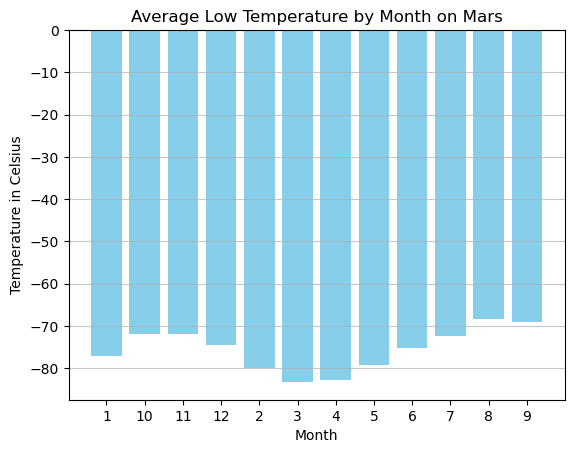

In [15]:
# Plot the average temperature by month

# Order data by month
average_low_temp_by_month = average_low_temp_by_month.sort_index()

# Plot the average temperature by month
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, color='skyblue')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(average_low_temp_by_month.index)  
plt.grid(axis='y', alpha=0.7)
plt.show()

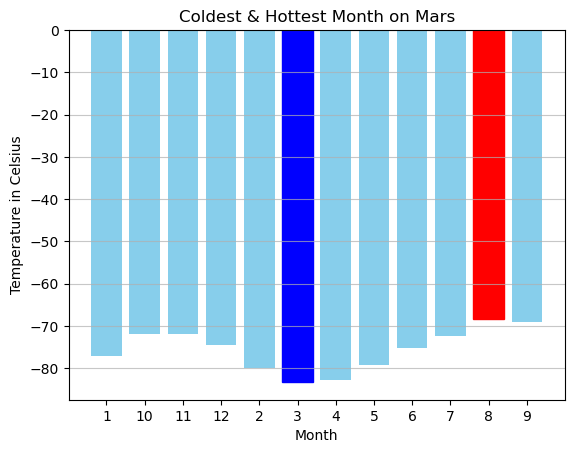

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Order data by month
average_low_temp_by_month = average_low_temp_by_month.sort_index()

# Identify the coldest and hottest months
coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

# Plot the average temperature by month
bars = plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, color='skyblue')

# Add markers to highlight the coldest and hottest months
for bar in bars:
    if bar.get_height() == average_low_temp_by_month[coldest_month]:
        bar.set_color('blue')  # Highlight coldest month in blue
    elif bar.get_height() == average_low_temp_by_month[hottest_month]:
        bar.set_color('red')  # Highlight hottest month in red

plt.title('Coldest & Hottest Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(average_low_temp_by_month.index)
plt.grid(axis='y', alpha=0.7)

plt.show()


In [17]:
# 4. Average pressure by Martian month

# Group the data by 'month' and calculate the average 'pressure' for each month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

average_pressure_by_month

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

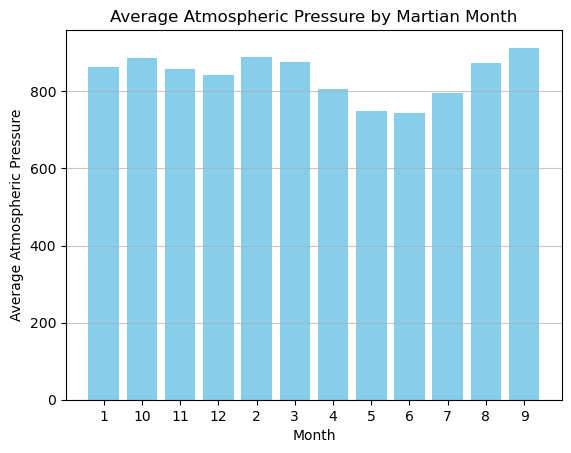

In [18]:
# Plot the average pressure by month

# Order data by month
average_pressure_by_month = average_pressure_by_month.sort_index()

# Plot the average pressure by month as a bar graph
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='skyblue')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(average_pressure_by_month.index)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

martian_year_duration = df['sol'].max()

# Calculate the equivalent terrestrial (earth) days and round it to a whole number
# Rounded to the nearest whole number
terrestrial_days_in_martian_year = round(martian_year_duration * 1.0275)  # Martian day is approximately 1.0275 Earth days

print(f"There are approximately {terrestrial_days_in_martian_year} terrestrial (earth) days in a Martian year.")


# The example answer shows a plot, and I'm not sure what kind it is? The question can be answered without a visual aid while still using the same data set.

There are approximately 2031 terrestrial (earth) days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV

# Define the CSV file path of where to save the data
csv_file_path = 'martian_data.csv'

# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been exported to {csv_file_path}.")


DataFrame has been exported to martian_data.csv.


In [21]:
browser.quit()